1. load and check data

---



In [ ]:

import pandas as pd

path = ''

#load our data
# drRatings = pd.read_excel('./data/OBGYN_new_train_80000.xlsx',nrows=1000)
drRatings = pd.read_excel('./data/OBGYN_new_train_80000.xlsx')


#shuffle the data so that they are in random sequence
drRatings = drRatings.sample(frac=1)

import matplotlib.pyplot as plt
%matplotlib inline



Text(0.5, 0, 'Rating')

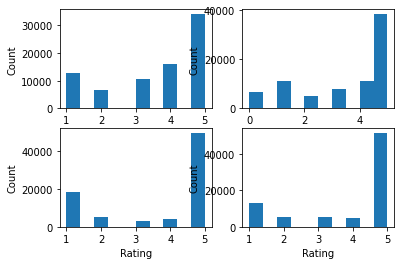

In [ ]:
#check the distribution of the four ratings. 
plt.subplot(2, 2, 1)
plt.hist(drRatings['punctuality'])
plt.ylabel('Count')
plt.xlabel('Rating')
plt.subplot(2, 2, 2)
plt.hist(drRatings['staff'])
plt.ylabel('Count')
plt.xlabel('Rating')
plt.subplot(2, 2, 3)
plt.hist(drRatings['helpfulness'])
plt.ylabel('Count')
plt.xlabel('Rating')
plt.subplot(2, 2, 4)
plt.hist(drRatings['knowledge'])
plt.ylabel('Count')
plt.xlabel('Rating')


In [ ]:
drRatings.head(5)

,reviewID,doctorID,doctorName,specialty,numReviews,city,state,doctorHomepage,averageRating,staff,punctuality,helpfulness,knowledge,postedTime,review,review_helpful_count
29734,29735,3298164,Dr. Okey Okoli,Gynecologist (OBGYN),8,San Antonio,TX,/doctor-ratings/3298164/Dr-Okey-Okoli-San%2BAn...,4.50,4,4,5,5,2013-12-17 20:59:00,I was referred to this Dr. back in June for my...,0
75297,75298,162821,Dr. Michael J. Straker,Gynecologist (OBGYN),18,Nutley,NJ,/doctor-ratings/162821/Dr-Michael%2BJ.-Straker...,5.00,5,5,5,5,2010-11-07 18:13:00,my first pregnancy i didnt go to dr.straker a ...,0
5999,6000,3366471,Dr. Catalin G. Marinescu,Gynecologist (OBGYN),25,Newport Beach,CA,/doctor-ratings/3366471/Dr-Catalin%2BG.-Marine...,4.50,5,3,5,5,2014-04-08 22:19:00,"He is amazing. He takes his time, explains thi...",1
48528,48529,50278,Dr. Craig L. Bissinger,Gynecologist (OBGYN),32,Parsippany,NJ,/doctor-ratings/50278/Dr-Craig%2BL.-Bissinger-...,4.50,5,4,5,4,2015-02-06 00:21:00,"He is the best doctor, very helpful and cooper...",0
8338,8339,544050,Dr. Jung K. Choe,Gynecologist (OBGYN),6,Marlton,NJ,/doctor-ratings/544050/Dr-Jung%2BK.-Choe-Marlt...,4.25,5,2,5,5,2009-08-31 09:20:00,Everyone has different experiences with fertil...,0


2. Prepare the input and output

In [ ]:
#prepare input and output features
drRatings['highPunctuality'] = (drRatings['punctuality']>4).astype(int)
drRatings.head(5)

,reviewID,doctorID,doctorName,specialty,numReviews,city,state,doctorHomepage,averageRating,staff,punctuality,helpfulness,knowledge,postedTime,review,review_helpful_count,highPunctuality
29734,29735,3298164,Dr. Okey Okoli,Gynecologist (OBGYN),8,San Antonio,TX,/doctor-ratings/3298164/Dr-Okey-Okoli-San%2BAn...,4.50,4,4,5,5,2013-12-17 20:59:00,I was referred to this Dr. back in June for my...,0,0
75297,75298,162821,Dr. Michael J. Straker,Gynecologist (OBGYN),18,Nutley,NJ,/doctor-ratings/162821/Dr-Michael%2BJ.-Straker...,5.00,5,5,5,5,2010-11-07 18:13:00,my first pregnancy i didnt go to dr.straker a ...,0,1
5999,6000,3366471,Dr. Catalin G. Marinescu,Gynecologist (OBGYN),25,Newport Beach,CA,/doctor-ratings/3366471/Dr-Catalin%2BG.-Marine...,4.50,5,3,5,5,2014-04-08 22:19:00,"He is amazing. He takes his time, explains thi...",1,0
48528,48529,50278,Dr. Craig L. Bissinger,Gynecologist (OBGYN),32,Parsippany,NJ,/doctor-ratings/50278/Dr-Craig%2BL.-Bissinger-...,4.50,5,4,5,4,2015-02-06 00:21:00,"He is the best doctor, very helpful and cooper...",0,0
8338,8339,544050,Dr. Jung K. Choe,Gynecologist (OBGYN),6,Marlton,NJ,/doctor-ratings/544050/Dr-Jung%2BK.-Choe-Marlt...,4.25,5,2,5,5,2009-08-31 09:20:00,Everyone has different experiences with fertil...,0,0


In [ ]:
drRatings['highPunctuality'].describe()

count    80000.000000
mean         0.426500
std          0.494571
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: highPunctuality, dtype: float64

In [ ]:
temp = pd.get_dummies(drRatings['state'])
drRatings = pd.concat([drRatings,temp],axis=1)
drRatings.head()

,reviewID,doctorID,doctorName,specialty,numReviews,city,state,doctorHomepage,averageRating,staff,punctuality,helpfulness,knowledge,postedTime,review,review_helpful_count,highPunctuality,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VT,WA,WB,WI,WV,WY
29734,29735,3298164,Dr. Okey Okoli,Gynecologist (OBGYN),8,San Antonio,TX,/doctor-ratings/3298164/Dr-Okey-Okoli-San%2BAn...,4.50,4,4,5,5,2013-12-17 20:59:00,I was referred to this Dr. back in June for my...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
75297,75298,162821,Dr. Michael J. Straker,Gynecologist (OBGYN),18,Nutley,NJ,/doctor-ratings/162821/Dr-Michael%2BJ.-Straker...,5.00,5,5,5,5,2010-11-07 18:13:00,my first pregnancy i didnt go to dr.straker a ...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5999,6000,3366471,Dr. Catalin G. Marinescu,Gynecologist (OBGYN),25,Newport Beach,CA,/doctor-ratings/3366471/Dr-Catalin%2BG.-Marine...,4.50,5,3,5,5,2014-04-08 22:19:00,"He is amazing. He takes his time, explains thi...",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48528,48529,50278,Dr. Craig L. Bissinger,Gynecologist (OBGYN),32,Parsippany,NJ,/doctor-ratings/50278/Dr-Craig%2BL.-Bissinger-...,4.50,5,4,5,4,2015-02-06 00:21:00,"He is the best doctor, very helpful and cooper...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8338,8339,544050,Dr. Jung K. Choe,Gynecologist (OBGYN),6,Marlton,NJ,/doctor-ratings/544050/Dr-Jung%2BK.-Choe-Marlt...,4.25,5,2,5,5,2009-08-31 09:20:00,Everyone has different experiences with fertil...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
drRatings['postedTime']=pd.to_datetime(drRatings['postedTime'])
drRatings['year']=drRatings['postedTime'].dt.year
drRatings['hour']=drRatings['postedTime'].dt.hour
drRatings.head()

,reviewID,doctorID,doctorName,specialty,numReviews,city,state,doctorHomepage,averageRating,staff,punctuality,helpfulness,knowledge,postedTime,review,review_helpful_count,highPunctuality,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VT,WA,WB,WI,WV,WY,year,hour
29734,29735,3298164,Dr. Okey Okoli,Gynecologist (OBGYN),8,San Antonio,TX,/doctor-ratings/3298164/Dr-Okey-Okoli-San%2BAn...,4.50,4,4,5,5,2013-12-17 20:59:00,I was referred to this Dr. back in June for my...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2013,20
75297,75298,162821,Dr. Michael J. Straker,Gynecologist (OBGYN),18,Nutley,NJ,/doctor-ratings/162821/Dr-Michael%2BJ.-Straker...,5.00,5,5,5,5,2010-11-07 18:13:00,my first pregnancy i didnt go to dr.straker a ...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,18
5999,6000,3366471,Dr. Catalin G. Marinescu,Gynecologist (OBGYN),25,Newport Beach,CA,/doctor-ratings/3366471/Dr-Catalin%2BG.-Marine...,4.50,5,3,5,5,2014-04-08 22:19:00,"He is amazing. He takes his time, explains thi...",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,22
48528,48529,50278,Dr. Craig L. Bissinger,Gynecologist (OBGYN),32,Parsippany,NJ,/doctor-ratings/50278/Dr-Craig%2BL.-Bissinger-...,4.50,5,4,5,4,2015-02-06 00:21:00,"He is the best doctor, very helpful and cooper...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,0
8338,8339,544050,Dr. Jung K. Choe,Gynecologist (OBGYN),6,Marlton,NJ,/doctor-ratings/544050/Dr-Jung%2BK.-Choe-Marlt...,4.25,5,2,5,5,2009-08-31 09:20:00,Everyone has different experiences with fertil...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,9


3. Train Logit Model (model1)

In [ ]:
#decide x and y
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA',
       'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'hour','numReviews']

ycol = 'highPunctuality'

x = drRatings[xcols]
print(x.shape)

import statsmodels.api as sm
x = sm.add_constant(x)
y = drRatings[ycol]
print(x.shape,y.shape)



(80000, 52)


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


(80000, 53) (80000,)


In [ ]:
import statsmodels.api as sm
logit_model1 = sm.Logit(y, x)
logit_result = logit_model1.fit()
logit_result.summary2()

Optimization terminated successfully.
         Current function value: 0.674984
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.011      
Dependent Variable: highPunctuality  AIC:              108103.4113
Date:               2021-08-24 01:45 BIC:              108595.7697
No. Observations:   80000            Log-Likelihood:   -53999.    
Df Model:           52               LL-Null:          -54584.    
Df Residuals:       79947            LLR p-value:      5.1110e-211
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
------------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const       -113.4387   5.5328 -20.5029 0.0000 -124.2828 -102.5946
AK             0.1092   0.1998   0.5467 0.5846   -0.2823    0.5007
AL            -0.0521   0.1146  -0.4546 0.6494   -0.2767    0.1725
AR            -0.0604   0.1281  -0.4712 0.6375   -0.3114    0.1907
AZ            -0.5092   0.1111  -4.5816 0.0000   -0.7270   -0.2914
CA            -0.5245   0.1043  -5.0282 0.0000   -0.7289   -0.3200
CO            -0.1732   0.1221  -1.4188 0.1560   -0.4125    0.0661
CT            -0.1520   0.1196  -1.2710 0.2037   -0.3864    0.0824
DC            -0.4453   0.1441  -3.0899 0.0020   -0.7278   -0.1628
DE            -0.6679   0.1613  -4.1402 0.0000   -0.9841   -0.3517
FL            -0.3097   0.1046  -2.9610 0.0031   -0.5147   -0.1047
GA            -0.2666   0.1100  -2.4247 0.0153   -0.4821   -0.0511
HI            -0.3483   0.1710  -2.0373 0.0416   -0.6835   -0.0132
IA            -0.1494   0.1477  -1.0117 0.3117   -0.4388    0.1400
ID            -0.2535   0.1502  -1.6878 0.0914   -0.5479    0.0409
IL            -0.3843   0.1083  -3.5475 0.0004   -0.5967   -0.1720
IN            -0.1337   0.1179  -1.1339 0.2568   -0.3648    0.0974
KS            -0.2142   0.1305  -1.6414 0.1007   -0.4699    0.0416
KY            -0.2517   0.1257  -2.0022 0.0453   -0.4981   -0.0053
LA            -0.1214   0.1183  -1.0264 0.3047   -0.3532    0.1104
MA            -0.4217   0.1151  -3.6653 0.0002   -0.6472   -0.1962
MD            -0.4424   0.1108  -3.9944 0.0001   -0.6595   -0.2253
ME            -0.0373   0.1960  -0.1904 0.8490   -0.4215    0.3469
MI            -0.3037   0.1095  -2.7737 0.0055   -0.5182   -0.0891
MN            -0.0700   0.1263  -0.5546 0.5792   -0.3175    0.1775
MO            -0.0367   0.1124  -0.3262 0.7443   -0.2570    0.1837
MS             0.1857   0.1434   1.2946 0.1955   -0.0954    0.4667
NC            -0.0562   0.1138  -0.4940 0.6213   -0.2792    0.1668
ND            -0.5078   0.2291  -2.2168 0.0266   -0.9567   -0.0588
NE            -0.0021   0.1424  -0.0146 0.9884   -0.2812    0.2770
NJ            -0.4000   0.1053  -3.7988 0.0001   -0.6064   -0.1936
NM            -0.4078   0.1591  -2.5628 0.0104   -0.7196   -0.0959
NV            -0.5368   0.1193  -4.4992 0.0000   -0.7706   -0.3029
NY            -0.5902   0.1044  -5.6527 0.0000   -0.7949   -0.3856
OH            -0.3712   0.1089  -3.4088 0.0007   -0.5846   -0.1578
OK            -0.3412   0.1149  -2.9701 0.0030   -0.5664   -0.1160
OR            -0.1915   0.1316  -1.4550 0.1457   -0.4494    0.0665
PA            -0.4238   0.1101  -3.8508 0.0001   -0.6395   -0.2081
PR             0.2510   0.2017   1.2448 0.2132   -0.1442    0.6463
RI            -0.0427   0.1581  -0.2703 0.7870   -0.3526    0.2671
SC            -0.2346   0.1218  -1.9263 0.0541   -0.4733    0.0041
SD            -0.0262   0.1899  -0.1378 0.8904   -0.3985    0.3461
TN            -0.0705   0.1124  -0.6267 0.5309   -0.2908    0.1499
TX            -0.3709   0.1042  -3.5596 0.0004   -0.5751   -0.1667
UT            -0.3752   0.1161  -3.2321 0.0012   -0.6027   -0.1477
VA            -0.4212   0.1083  -3.8886 0.0001   -0.6334   -0.2089
WA            -0.2617   

In [ ]:
#predict highPunctuality using the trained logit model
drRatings['highPunctuality_predictLogit'] = (logit_result.predict(x) >= 0.5).astype(int)
drRatings[['highPunctuality_predictLogit','highPunctuality']]

,highPunctuality_predictLogit,highPunctuality
29734,0,0
75297,0,1
5999,0,0
48528,0,0
8338,0,0
...,...,...
16469,1,0
76912,0,0
34354,0,0
26472,0,1


0.5815625
[[41734  4146]
 [29329  4791]]


Text(33.0, 0.5, 'highPunctuality')

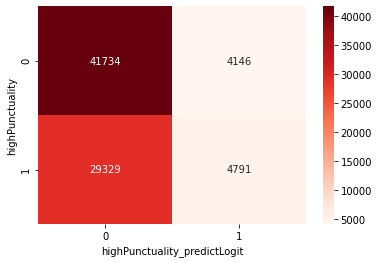

In [ ]:
import sklearn.metrics as metrics
acc=metrics.accuracy_score(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit'])
print(acc)
confusion=metrics.confusion_matrix(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit'])
print(confusion)
import seaborn as sn
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highPunctuality_predictLogit") 
plt.ylabel("highPunctuality") 


Text(33.0, 0.5, 'highPunctuality')

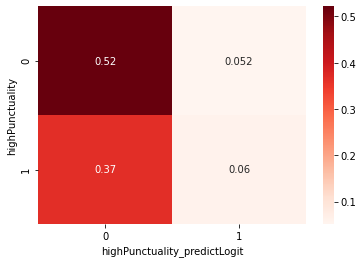

In [ ]:
import numpy as np
sn.heatmap(confusion/np.sum(confusion), annot=True, cmap='Reds', fmt='.2')
plt.xlabel("highPunctuality_predictLogit") 
plt.ylabel("highPunctuality") 


Try a different model - Probit

In [ ]:
probit_model2 = sm.Probit(y, x)
probit_result = probit_model2.fit()
probit_result.summary2()

Optimization terminated successfully.
         Current function value: 0.674993
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Probit
==================================================================
Model:              Probit           Pseudo R-squared: 0.011      
Dependent Variable: highPunctuality  AIC:              108104.8315
Date:               2021-08-24 01:46 BIC:              108597.1899
No. Observations:   80000            Log-Likelihood:   -53999.    
Df Model:           52               LL-Null:          -54584.    
Df Residuals:       79947            LLR p-value:      1.0087e-210
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
------------------------------------------------------------------
                Coef.   Std.Err.    z     P>|z|   [0.025   0.975] 
------------------------------------------------------------------
const          -70.5608   3.4290 -20.5778 0.0000 -77.2815 -63.8401
AK               0.0680   0.1247   0.5453 0.5855  -0.1764   0.3124
AL              -0.0332   0.0716  -0.4636 0.6429  -0.1736   0.1072
AR              -0.0382   0.0801  -0.4763 0.6338  -0.1952   0.1188
AZ              -0.3186   0.0693  -4.5942 0.0000  -0.4545  -0.1827
CA              -0.3278   0.0651  -5.0312 0.0000  -0.4555  -0.2001
CO              -0.1086   0.0763  -1.4225 0.1549  -0.2582   0.0410
CT              -0.0954   0.0747  -1.2762 0.2019  -0.2419   0.0511
DC              -0.2791   0.0896  -3.1135 0.0018  -0.4547  -0.1034
DE              -0.4161   0.0997  -4.1739 0.0000  -0.6115  -0.2207
FL              -0.1936   0.0654  -2.9625 0.0031  -0.3217  -0.0655
GA              -0.1669   0.0687  -2.4297 0.0151  -0.3016  -0.0323
HI              -0.2174   0.1067  -2.0377 0.0416  -0.4264  -0.0083
IA              -0.0938   0.0924  -1.0155 0.3099  -0.2749   0.0873
ID              -0.1587   0.0938  -1.6918 0.0907  -0.3426   0.0252
IL              -0.2404   0.0677  -3.5527 0.0004  -0.3730  -0.1078
IN              -0.0838   0.0737  -1.1367 0.2557  -0.2282   0.0607
KS              -0.1340   0.0815  -1.6444 0.1001  -0.2938   0.0257
KY              -0.1575   0.0786  -2.0045 0.0450  -0.3115  -0.0035
LA              -0.0761   0.0740  -1.0294 0.3033  -0.2211   0.0688
MA              -0.2634   0.0718  -3.6679 0.0002  -0.4042  -0.1227
MD              -0.2768   0.0691  -4.0030 0.0001  -0.4123  -0.1413
ME              -0.0236   0.1226  -0.1924 0.8475  -0.2639   0.2167
MI              -0.1903   0.0684  -2.7815 0.0054  -0.3243  -0.0562
MN              -0.0438   0.0789  -0.5550 0.5789  -0.1985   0.1109
MO              -0.0236   0.0703  -0.3360 0.7369  -0.1614   0.1141
MS               0.1166   0.0896   1.3019 0.1929  -0.0589   0.2922
NC              -0.0354   0.0711  -0.4974 0.6189  -0.1747   0.1040
ND              -0.3169   0.1424  -2.2246 0.0261  -0.5960  -0.0377
NE              -0.0019   0.0890  -0.0217 0.9827  -0.1764   0.1726
NJ              -0.2514   0.0658  -3.8223 0.0001  -0.3803  -0.1225
NM              -0.2547   0.0992  -2.5664 0.0103  -0.4491  -0.0602
NV              -0.3353   0.0743  -4.5126 0.0000  -0.4809  -0.1897
NY              -0.3684   0.0652  -5.6509 0.0000  -0.4962  -0.2406
OH              -0.2320   0.0680  -3.4118 0.0006  -0.3653  -0.0987
OK              -0.2138   0.0717  -2.9811 0.0029  -0.3544  -0.0733
OR              -0.1199   0.0823  -1.4573 0.1450  -0.2812   0.0414
PA              -0.2650   0.0687  -3.8568 0.0001  -0.3997  -0.1303
PR               0.1572   0.1252   1.2556 0.2093  -0.0882   0.4027
RI              -0.0275   0.0988  -0.2781 0.7809  -0.2211   0.1661
SC              -0.1470   0.0761  -1.9304 0.0536  -0.2962   0.0023
SD              -0.0164   0.1189  -0.1380 0.8902  -0.2495   0.2167
TN              -0.0444   0.0703  -0.6322 0.5273  -0.1822   0.0933
TX              -0.2324   0.0651  -3.5699 0.0004  -0.3600  -0.1048
UT              -0.2354   0.0725  -3.2488 0.0012  -0.3775  -0.0934
VA              -0.2640   0.0676  -3.9045 0.0001  -0.3965  -0.1315
WA              -0.1641 

In [ ]:
#predict highPunctuality using the trained probit model
drRatings['highPunctuality_predictProbit'] = (probit_result.predict(x) >= 0.5).astype(int)
drRatings[['highPunctuality_predictProbit','highPunctuality']]

,highPunctuality_predictProbit,highPunctuality
29734,0,0
75297,0,1
5999,0,0
48528,0,0
8338,0,0
...,...,...
16469,1,0
76912,0,0
34354,0,0
26472,0,1


0.5812875
[[41750  4130]
 [29367  4753]]


Text(33.0, 0.5, 'highPunctuality')

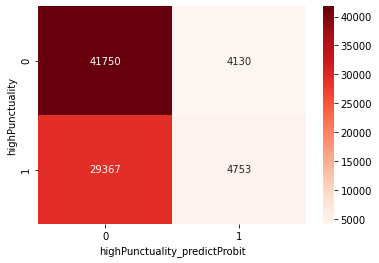

In [ ]:
import sklearn.metrics as metrics
acc=metrics.accuracy_score(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictProbit'])
print(acc)
confusion=metrics.confusion_matrix(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictProbit'])
print(confusion)
import seaborn as sn
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highPunctuality_predictProbit") 
plt.ylabel("highPunctuality") 


Try keywords for better predictions

In [ ]:
drRatings['good']=drRatings['review'].apply(lambda x: int('good' in x))
drRatings['bad']=drRatings['review'].apply(lambda x: int('bad' in x))
drRatings.head()

,reviewID,doctorID,doctorName,specialty,numReviews,city,state,doctorHomepage,averageRating,staff,punctuality,helpfulness,knowledge,postedTime,review,review_helpful_count,highPunctuality,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VT,WA,WB,WI,WV,WY,year,hour,highPunctuality_predictLogit,highPunctuality_predictProbit,good,bad
29734,29735,3298164,Dr. Okey Okoli,Gynecologist (OBGYN),8,San Antonio,TX,/doctor-ratings/3298164/Dr-Okey-Okoli-San%2BAn...,4.50,4,4,5,5,2013-12-17 20:59:00,I was referred to this Dr. back in June for my...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2013,20,0,0,0,1
75297,75298,162821,Dr. Michael J. Straker,Gynecologist (OBGYN),18,Nutley,NJ,/doctor-ratings/162821/Dr-Michael%2BJ.-Straker...,5.00,5,5,5,5,2010-11-07 18:13:00,my first pregnancy i didnt go to dr.straker a ...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,18,0,0,0,0
5999,6000,3366471,Dr. Catalin G. Marinescu,Gynecologist (OBGYN),25,Newport Beach,CA,/doctor-ratings/3366471/Dr-Catalin%2BG.-Marine...,4.50,5,3,5,5,2014-04-08 22:19:00,"He is amazing. He takes his time, explains thi...",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,22,0,0,0,0
48528,48529,50278,Dr. Craig L. Bissinger,Gynecologist (OBGYN),32,Parsippany,NJ,/doctor-ratings/50278/Dr-Craig%2BL.-Bissinger-...,4.50,5,4,5,4,2015-02-06 00:21:00,"He is the best doctor, very helpful and cooper...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,0,0,0,0,0
8338,8339,544050,Dr. Jung K. Choe,Gynecologist (OBGYN),6,Marlton,NJ,/doctor-ratings/544050/Dr-Jung%2BK.-Choe-Marlt...,4.25,5,2,5,5,2009-08-31 09:20:00,Everyone has different experiences with fertil...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,9,0,0,1,0


(80000, 54)
(80000, 55) (80000,)
Optimization terminated successfully.
         Current function value: 0.672216
         Iterations 5
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.015      
Dependent Variable: highPunctuality  AIC:              107664.5465
Date:               2021-08-24 01:46 BIC:              108175.4845
No. Observations:   80000            Log-Likelihood:   -53777.    
Df Model:           54               LL-Null:          -54584.    
Df Residuals:       79945            LLR p-value:      3.2451e-302
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
------------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const       -115.9477   5.5469 -20.9030 0.0000 -126.8195 -105.0758
AK             0.102

Text(33.0, 0.5, 'highPunctuality')

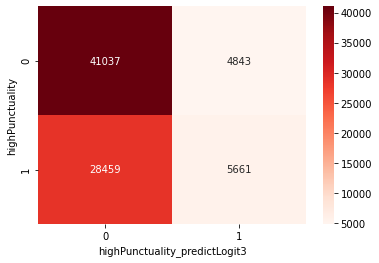

In [ ]:
#decide x and y
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA',
       'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'hour','numReviews','good','bad']

ycol = 'highPunctuality'

x = drRatings[xcols]
print(x.shape)
x = sm.add_constant(x)
y = drRatings[ycol]
print(x.shape,y.shape)
logit_model3 = sm.Logit(y, x)
logit_result = logit_model3.fit()
print(logit_result.summary2())
#predict highPunctuality using the trained logit model
drRatings['highPunctuality_predictLogit3'] = (logit_result.predict(x) >= 0.5).astype(int)
drRatings[['highPunctuality_predictLogit3','highPunctuality']]
acc=metrics.accuracy_score(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit3'])
print(acc)
confusion=metrics.confusion_matrix(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit3'])
print(confusion)
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highPunctuality_predictLogit3") 
plt.ylabel("highPunctuality") 


Search for a good set of keywords

In [ ]:
keywordlist = ['good','bad','time','wait','no']
for keyword in keywordlist:
  drRatings[keyword]=drRatings['review'].apply(lambda x: int(keyword in x))

drRatings.head()

,reviewID,doctorID,doctorName,specialty,numReviews,city,state,doctorHomepage,averageRating,staff,punctuality,helpfulness,knowledge,postedTime,review,review_helpful_count,highPunctuality,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,PR,RI,SC,SD,TN,TX,UT,VA,VT,WA,WB,WI,WV,WY,year,hour,highPunctuality_predictLogit,highPunctuality_predictProbit,good,bad,highPunctuality_predictLogit3,time,wait,no
29734,29735,3298164,Dr. Okey Okoli,Gynecologist (OBGYN),8,San Antonio,TX,/doctor-ratings/3298164/Dr-Okey-Okoli-San%2BAn...,4.50,4,4,5,5,2013-12-17 20:59:00,I was referred to this Dr. back in June for my...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2013,20,0,0,0,1,0,0,0,1
75297,75298,162821,Dr. Michael J. Straker,Gynecologist (OBGYN),18,Nutley,NJ,/doctor-ratings/162821/Dr-Michael%2BJ.-Straker...,5.00,5,5,5,5,2010-11-07 18:13:00,my first pregnancy i didnt go to dr.straker a ...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2010,18,0,0,0,0,0,1,0,1
5999,6000,3366471,Dr. Catalin G. Marinescu,Gynecologist (OBGYN),25,Newport Beach,CA,/doctor-ratings/3366471/Dr-Catalin%2BG.-Marine...,4.50,5,3,5,5,2014-04-08 22:19:00,"He is amazing. He takes his time, explains thi...",1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2014,22,0,0,0,0,0,1,0,1
48528,48529,50278,Dr. Craig L. Bissinger,Gynecologist (OBGYN),32,Parsippany,NJ,/doctor-ratings/50278/Dr-Craig%2BL.-Bissinger-...,4.50,5,4,5,4,2015-02-06 00:21:00,"He is the best doctor, very helpful and cooper...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2015,0,0,0,0,0,0,1,1,0
8338,8339,544050,Dr. Jung K. Choe,Gynecologist (OBGYN),6,Marlton,NJ,/doctor-ratings/544050/Dr-Jung%2BK.-Choe-Marlt...,4.25,5,2,5,5,2009-08-31 09:20:00,Everyone has different experiences with fertil...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,9,0,0,1,0,0,1,1,1


(80000, 57)
(80000, 58) (80000,)
Optimization terminated successfully.
         Current function value: 0.646484
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.052      
Dependent Variable: highPunctuality  AIC:              103553.4742
Date:               2021-08-24 01:46 BIC:              104092.2816
No. Observations:   80000            Log-Likelihood:   -51719.    
Df Model:           57               LL-Null:          -54584.    
Df Residuals:       79942            LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const       -128.7661   5.6814 -22.6647 0.0000 -139.9014 -117.6309
AK             0.067

Text(33.0, 0.5, 'highPunctuality')

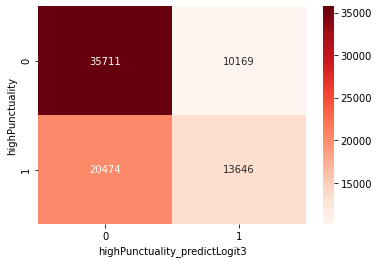

In [ ]:
xcols = ['AK', 'AL', 'AR', 'AZ', 'CA',
       'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'hour','numReviews','good','bad','time','wait','no']

ycol = 'highPunctuality'

x = drRatings[xcols]
print(x.shape)
x = sm.add_constant(x)
y = drRatings[ycol]
print(x.shape,y.shape)
logit_model3 = sm.Logit(y, x)
logit_result = logit_model3.fit()
print(logit_result.summary2())
#predict highPunctuality using the trained logit model
drRatings['highPunctuality_predictLogit3'] = (logit_result.predict(x) >= 0.5).astype(int)
drRatings[['highPunctuality_predictLogit3','highPunctuality']]
acc=metrics.accuracy_score(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit3'])
print(acc)
confusion=metrics.confusion_matrix(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit3'])
print(confusion)
sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
plt.xlabel("highPunctuality_predictLogit3") 
plt.ylabel("highPunctuality") 

In [ ]:

def search4keywords(keywordlist):
  for keyword in keywordlist:
    drRatings[keyword]=drRatings['review'].apply(lambda x: int(keyword in x))

  drRatings.head()
  xcols = ['AK', 'AL', 'AR', 'AZ', 'CA',
       'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS',
       'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'NC', 'ND', 'NE',
       'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VA', 'WA', 'WI', 'WV', 'WY', 'year', 'hour','numReviews']+keywordlist

  ycol = 'highPunctuality'

  x = drRatings[xcols]
  print(x.shape)
  x = sm.add_constant(x)
  y = drRatings[ycol]
  print(x.shape,y.shape)
  logit_model3 = sm.Logit(y, x)
  logit_result = logit_model3.fit()
  print(logit_result.summary2())
  #predict highPunctuality using the trained logit model
  drRatings['highPunctuality_predictLogit3'] = (logit_result.predict(x) >= 0.5).astype(int)
  drRatings[['highPunctuality_predictLogit3','highPunctuality']]
  acc=metrics.accuracy_score(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit3'])
  print(acc)
  confusion=metrics.confusion_matrix(y_true=drRatings['highPunctuality'],y_pred=drRatings['highPunctuality_predictLogit3'])
  print(confusion)
  sn.heatmap(confusion, annot=True, cmap='Reds', fmt='d')
  plt.xlabel("highPunctuality_predictLogit3") 
  plt.ylabel("highPunctuality") 
  return(acc)



(80000, 57)
(80000, 58) (80000,)
Optimization terminated successfully.
         Current function value: 0.646484
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.052      
Dependent Variable: highPunctuality  AIC:              103553.4742
Date:               2021-08-24 01:46 BIC:              104092.2816
No. Observations:   80000            Log-Likelihood:   -51719.    
Df Model:           57               LL-Null:          -54584.    
Df Residuals:       79942            LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const       -128.7661   5.6814 -22.6647 0.0000 -139.9014 -117.6309
AK             0.067

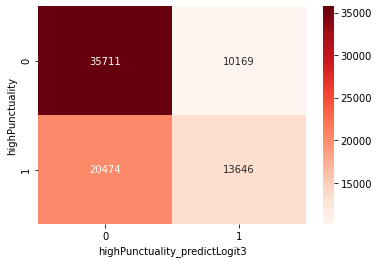

In [ ]:
keywordlist = ['good','bad','time','wait','no']
acc=search4keywords(keywordlist)

(80000, 60)
(80000, 61) (80000,)
Optimization terminated successfully.
         Current function value: 0.640691
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.061      
Dependent Variable: highPunctuality  AIC:              102632.6143
Date:               2021-08-24 01:46 BIC:              103199.2910
No. Observations:   80000            Log-Likelihood:   -51255.    
Df Model:           60               LL-Null:          -54584.    
Df Residuals:       79939            LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
              Coef.   Std.Err.    z     P>|z|    [0.025    0.975] 
------------------------------------------------------------------
const       -132.6808   5.7127 -23.2257 0.0000 -143.8774 -121.4841
AK             0.083

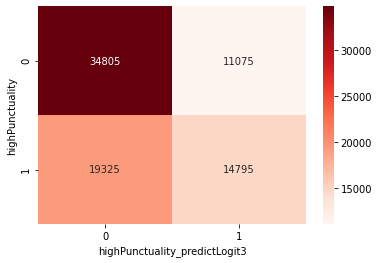

In [ ]:
keywordlist = ['good','bad','time','wait','no','early','late','minute']
acc=search4keywords(keywordlist)